In [4]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
# %matplotlib inline import warnings
# warnings.filterwarnings('ignore') # ignore warnings
from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [5]:
df = pd.read_csv('AAPL.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,56.235001,56.250000,54.959999,55.267502,52.931545,197114800
1,2018-09-13,55.880001,57.087502,55.642502,56.602501,54.210121,166825600
2,2018-09-14,56.437500,56.709999,55.630001,55.959999,53.594772,127997200
3,2018-09-17,55.537498,55.737499,54.317501,54.470001,52.167763,148780400
4,2018-09-18,54.447498,55.462502,54.279999,54.560001,52.253944,126286800
5,2018-09-19,54.625000,54.904999,53.825001,54.592499,52.285072,108495200
6,2018-09-20,55.060001,55.570000,54.787498,55.007500,52.682533,106435200
7,2018-09-21,55.195000,55.340000,54.322498,54.415001,52.115070,384986800
8,2018-09-24,54.205002,55.314999,54.157501,55.197498,52.864502,110773600
9,2018-09-25,54.937500,55.705002,54.924999,55.547501,53.199711,98217600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,56.235001,56.250000,54.959999,55.267502,52.931545,197114800
1,2018-09-13,55.880001,57.087502,55.642502,56.602501,54.210121,166825600
2,2018-09-14,56.437500,56.709999,55.630001,55.959999,53.594772,127997200
3,2018-09-17,55.537498,55.737499,54.317501,54.470001,52.167763,148780400
4,2018-09-18,54.447498,55.462502,54.279999,54.560001,52.253944,126286800
5,2018-09-19,54.625000,54.904999,53.825001,54.592499,52.285072,108495200
6,2018-09-20,55.060001,55.570000,54.787498,55.007500,52.682533,106435200
7,2018-09-21,55.195000,55.340000,54.322498,54.415001,52.115070,384986800
8,2018-09-24,54.205002,55.314999,54.157501,55.197498,52.864502,110773600
9,2018-09-25,54.937500,55.705002,54.924999,55.547501,53.199711,98217600


In [9]:
class color:
    GREEN, RED = '\033[92m', '\033[91m'
    BOLD, UNDERLINE, END = '\033[1m', '\033[4m', '\033[0m'
    GREEN_BOLD = GREEN + BOLD
    RED_BOLD = RED + BOLD
    GREEN_BOLD_UND = GREEN_BOLD + UNDERLINE

rb, gb,  = color.RED_BOLD, color.GREEN_BOLD
gbu, end = color.GREEN_BOLD_UND, color.END

In [10]:
df.shape

(1257, 7)

In [11]:
df["Year"] = df["Date"].apply(lambda x : str(x)[:4])
df["Month"] = df["Date"].apply(lambda x : str(x)[5:7])
df["Day"] = df["Date"].apply(lambda x : str(x)[8:10])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2018-09-12,56.235001,56.250000,54.959999,55.267502,52.931545,197114800,2018,09,12
1,2018-09-13,55.880001,57.087502,55.642502,56.602501,54.210121,166825600,2018,09,13
2,2018-09-14,56.437500,56.709999,55.630001,55.959999,53.594772,127997200,2018,09,14
3,2018-09-17,55.537498,55.737499,54.317501,54.470001,52.167763,148780400,2018,09,17
4,2018-09-18,54.447498,55.462502,54.279999,54.560001,52.253944,126286800,2018,09,18


In [12]:
# Print the number of trading days
print(f'{rb}Total number of trading days: {end}{gbu}{df.shape[0]}{end}')
print(f'{rb}Total number of fields: {end}{gbu}{df.shape[1]}{end}')
print('\n')
# Check the Null and NA values
print(f'{rb}Null values: {end}{gbu}{df.isnull().values.sum()}{end}')
print(f'{rb}NA values: {end}{gbu}{df.isna().values.any()}{end}')

Total number of trading days: 1257
Total number of fields: 10


Null values: 0
NA values: False


In [13]:
# Create a new dataframe with only the Open column and convert it into a NumPy array
df = df['Open'].values

# Reshape the data
df = df.reshape(-1, 1)

In [14]:
# Split the data into training and testing sets
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [15]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [16]:
# Create the function that will help us to create the datasets
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [17]:
# Create the training and testing data by calling our function for each one
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [18]:
# Reshape the data to make it a 3D array in order to use it in LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [20]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [21]:
# Reshape the feature for the LSTM layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # for expecting 3 dimentions, not 2
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
# Define modifiable training hyperparameters
epochs = 40
batch_size = 64

# Save the model and start the training
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
model.save('stock_prediction')

Epoch 1/40
15/15 [==============================] - 14s 312ms/step - loss: 0.0520
Epoch 2/40
15/15 [==============================] - 6s 403ms/step - loss: 0.0072
Epoch 3/40
15/15 [==============================] - 4s 269ms/step - loss: 0.0047
Epoch 4/40
15/15 [==============================] - 4s 279ms/step - loss: 0.0043
Epoch 5/40
15/15 [==============================] - 6s 381ms/step - loss: 0.0039
Epoch 6/40
15/15 [==============================] - 4s 293ms/step - loss: 0.0042
Epoch 7/40
15/15 [==============================] - 6s 373ms/step - loss: 0.0043
Epoch 8/40
15/15 [==============================] - 4s 281ms/step - loss: 0.0042
Epoch 9/40
15/15 [==============================] - 4s 269ms/step - loss: 0.0040
Epoch 10/40
15/15 [==============================] - 5s 368ms/step - loss: 0.0037
Epoch 11/40
15/15 [==============================] - 4s 295ms/step - loss: 0.0041
Epoch 12/40
15/15 [==============================] - 4s 271ms/step - loss: 0.0035
Epoch 13/40
15/15 [=====

In [24]:
# Load the model
model = load_model('stock_prediction')

NameError: ignored

In [25]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

7/7 [==============================] - 2s 54ms/step


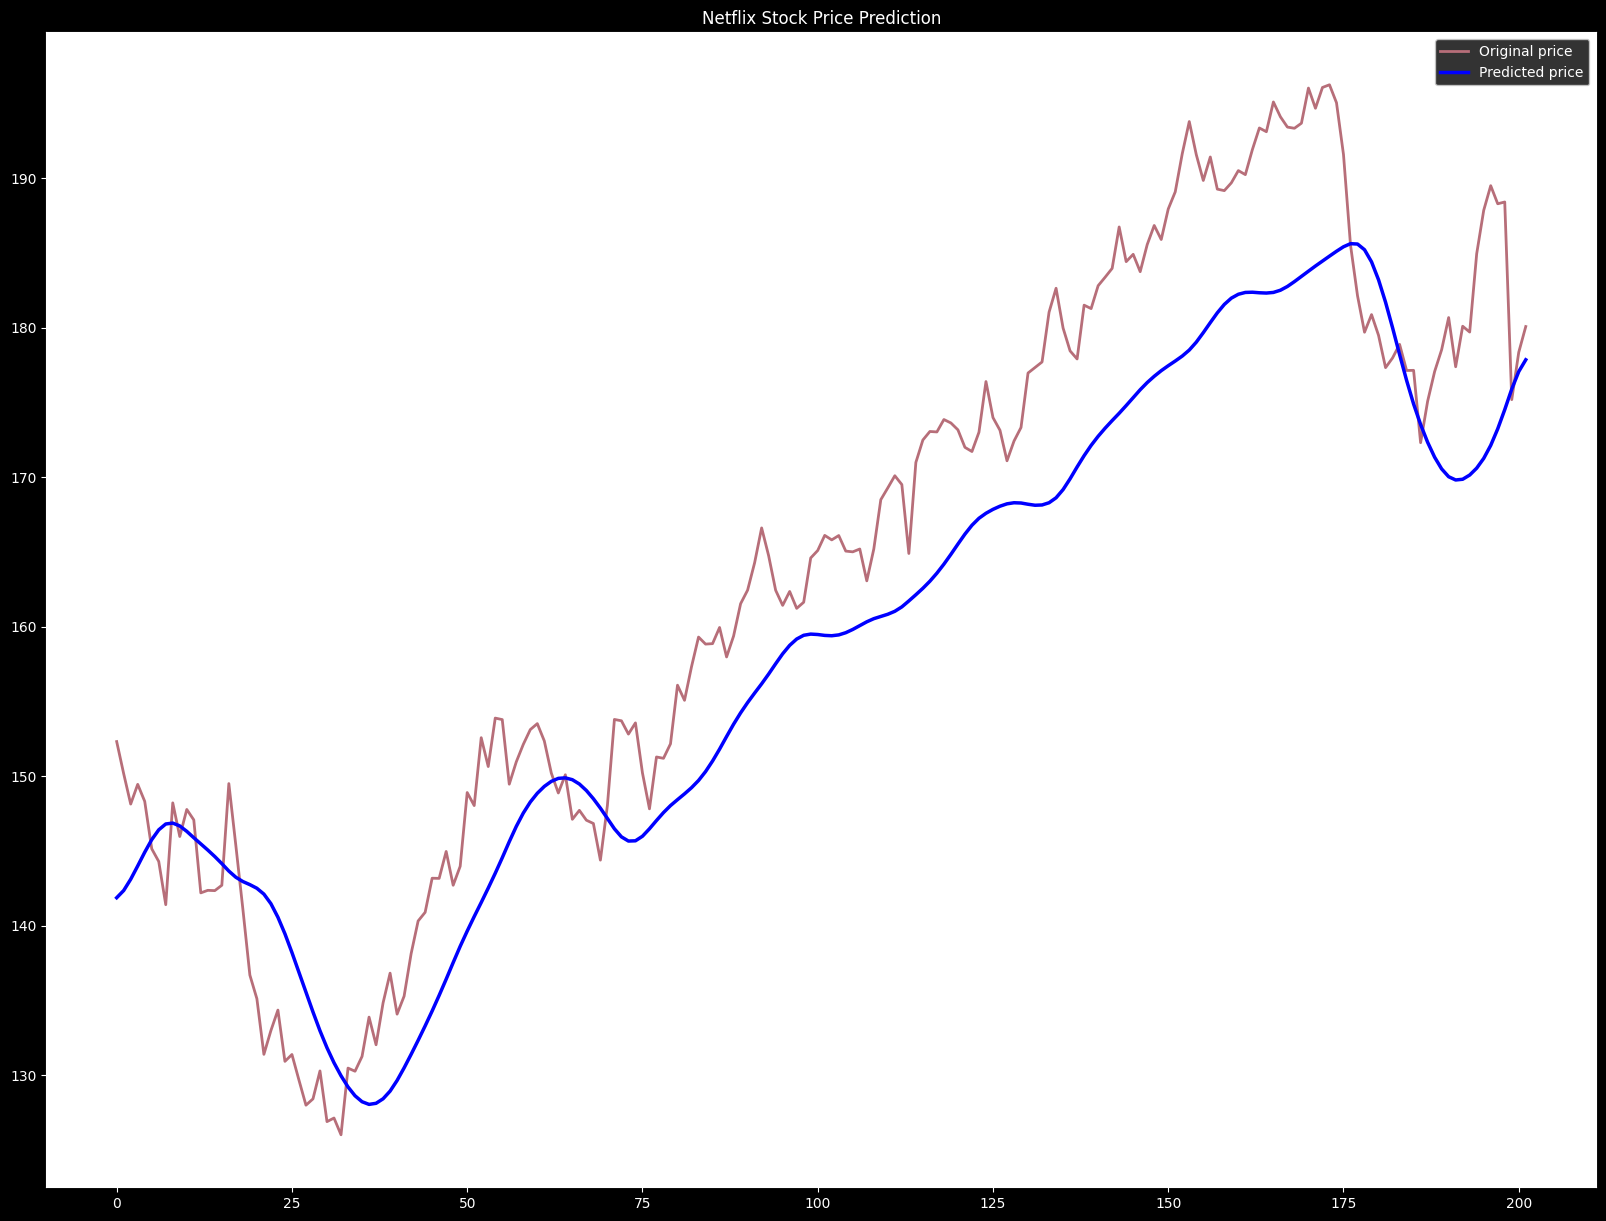

In [32]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20,15))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='#B76E79', linewidth=2, label='Original price')
plt.plot(predictions, color='blue', linewidth=2.5, label='Predicted price')
plt.title('Netflix Stock Price Prediction')
plt.legend();

Devanshi Joshi